# Impost libraries

In [ ]:
import math

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Get the stock price

In [ ]:
df = pdr.get_data_yahoo('NVR',start='2017-01-01',end='2021-12-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1650.000000,1665.000000,1631.780029,1649.989990,1649.989990,37400
2017-01-04,1654.000000,1686.520020,1645.030029,1678.770020,1678.770020,22500
2017-01-05,1676.199951,1690.829956,1671.510010,1689.400024,1689.400024,24200
2017-01-06,1684.010010,1697.479980,1675.010010,1678.099976,1678.099976,23400
2017-01-09,1680.800049,1689.000000,1666.550049,1681.500000,1681.500000,17100
...,...,...,...,...,...,...
2021-12-23,5826.669922,5847.799805,5779.890137,5784.629883,5784.629883,7400
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900


In [ ]:
df.shape

(1258, 6)

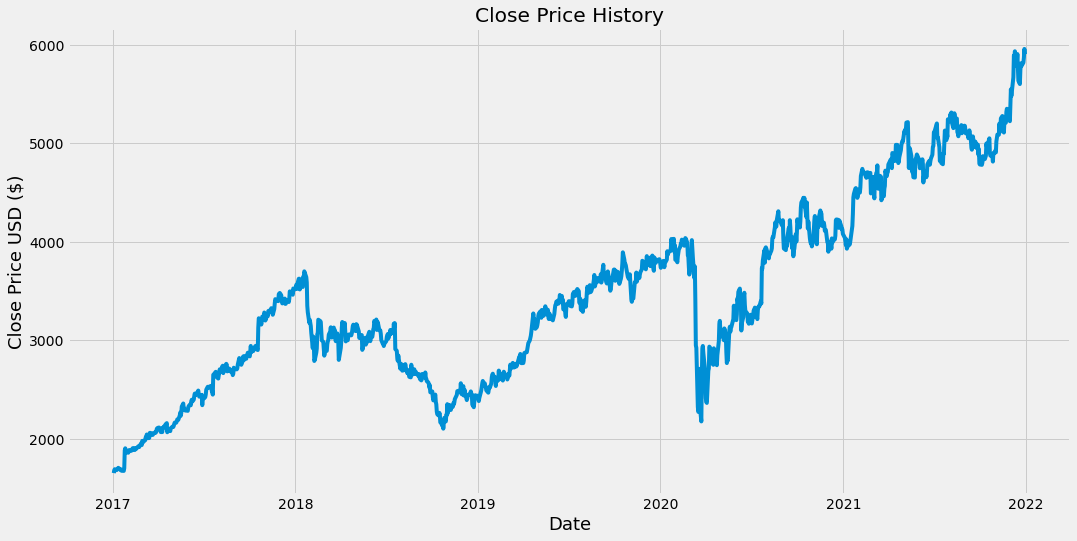

In [ ]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# new df with only Close column
data = df.filter(['Close'])

# Converting df to numpy array
dataset = data.values

# Getting no. of rows to train LSTM model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1007

In [ ]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.        ],
       [0.00667852],
       [0.00914526],
       ...,
       [0.97914765],
       [1.        ],
       [0.98763145]])

In [ ]:
# Create training dataset
train_data = scaled_data[0:training_data_len,:]

# number of days to track for the model
nd = 30

# Split to X-train and y_train
x_train = []
y_train = []

for i in range(nd,len(train_data)):
    x_train.append(train_data[i-nd:i,0])
    y_train.append(train_data[i,0])
    if i<=nd+1:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00667852, 0.00914526, 0.00652304, 0.00731203,
       0.00950957, 0.00946085, 0.01244738, 0.01160503, 0.00675741,
       0.00858136, 0.00546953, 0.00542078, 0.00518873, 0.01160503,
       0.05351631, 0.05841497, 0.04873368, 0.05263914, 0.04826957,
       0.04802358, 0.05221449, 0.05440739, 0.05336547, 0.05239318,
       0.05565585, 0.05456985, 0.05880716, 0.05903224, 0.05437493])]
[0.05646341745992883]

[array([0.        , 0.00667852, 0.00914526, 0.00652304, 0.00731203,
       0.00950957, 0.00946085, 0.01244738, 0.01160503, 0.00675741,
       0.00858136, 0.00546953, 0.00542078, 0.00518873, 0.01160503,
       0.05351631, 0.05841497, 0.04873368, 0.05263914, 0.04826957,
       0.04802358, 0.05221449, 0.05440739, 0.05336547, 0.05239318,
       0.05565585, 0.05456985, 0.05880716, 0.05903224, 0.05437493]), array([0.00667852, 0.00914526, 0.00652304, 0.00731203, 0.00950957,
       0.00946085, 0.01244738, 0.01160503, 0.00675741, 0.00858136,
       0.00546953, 0.00542078, 0.

In [ ]:
# Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
# Reshaping the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0],nd,1))
x_train.shape

(977, 30, 1)

In [ ]:
# Building the model
model = Sequential()

In [ ]:
model.add(LSTM(30,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(30,return_sequences=False))
model.add(Dense(15))
model.add(Dense(15))
model.add(Dense(1))

In [ ]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# training
model.fit(x_train, y_train, batch_size=3, epochs=10)

Epoch 1/10
326/326 [==============================] - 5s 16ms/step - loss: 0.0038
Epoch 2/10
326/326 [==============================] - 4s 13ms/step - loss: 0.0013
Epoch 3/10
326/326 [==============================] - 4s 12ms/step - loss: 0.0012
Epoch 4/10
326/326 [==============================] - 4s 12ms/step - loss: 9.1080e-04
Epoch 5/10
326/326 [==============================] - 4s 12ms/step - loss: 7.8907e-04
Epoch 6/10
326/326 [==============================] - 4s 12ms/step - loss: 6.9846e-04
Epoch 7/10
326/326 [==============================] - 4s 13ms/step - loss: 6.4244e-04
Epoch 8/10
326/326 [==============================] - 7s 23ms/step - loss: 6.1372e-04
Epoch 9/10
326/326 [==============================] - 8s 24ms/step - loss: 5.1498e-04
Epoch 10/10
326/326 [==============================] - 7s 22ms/step - loss: 4.5993e-04


In [ ]:
# Creating the test dataset
test_data=scaled_data[training_data_len -nd:,:]

x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(nd, len(test_data)):
    x_test.append(test_data[i-nd:i,0])  

In [ ]:
# Converting the data to np.array
x_test = np.array(x_test)

In [ ]:
# Reshaping the data for LSTM
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Getting the predictions from the model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Getting the rmse (good measure to see stdv of residuals, better fit)?????????????????
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.8783557177539842

<ipython-input-19-b75db2debc4f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


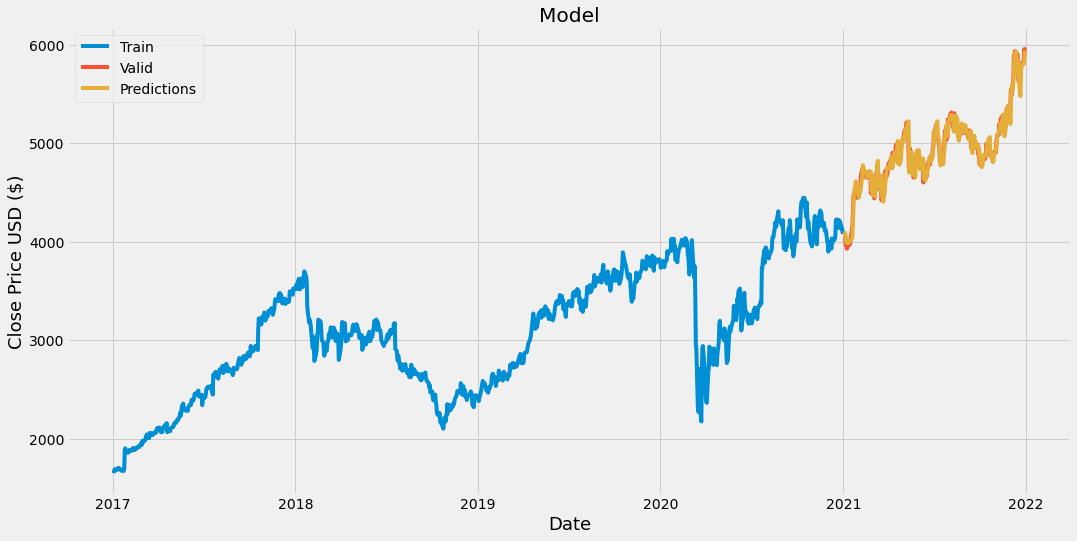

In [ ]:
# plotting the data
train = data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc='best')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-01-04,4040.649902,4104.596680
2021-01-05,4008.909912,4064.208740
2021-01-06,3966.489990,4029.492676
2021-01-07,4025.929932,3991.318604
2021-01-08,3930.000000,4026.696777
...,...,...
2021-12-23,5784.629883,5803.756348
2021-12-27,5820.069824,5803.432129
2021-12-28,5869.470215,5810.364258


In [ ]:
# Using our trained model and applying last 30 days data for next day prediction

In [ ]:
# Get the stock price
nvr_quote = pdr.get_data_yahoo('NVR',start='2022-01-01',end='2022-06-30')

# Creating a new df
new_df = nvr_quote.filter(['Close'])

# Getting the last 30 days closing price values and converting the df to an array
last_30_days = new_df[-30:].values

# Scaling the data between 0 and 1
last_30_days_scaled = scaler.transform(last_30_days)

# Creating an empty list
X_test = []

# Appending past 30 days
X_test.append(last_30_days_scaled)

# Convert the X_test data to a np.array
X_test = np.array(X_test)

# Reshaping the data
#########number of time steps, number of features
X_test = np.reshape(X_test,(X_test.shape[0], x_test.shape[1],1))

# Getting the predicted scaled prcies
pred_price = model.predict(X_test)

# undoing the scaling
pred_price = scaler.inverse_transform(pred_price)
print('prediction for the day following',nvr_quote.index[-1])
print(pred_price)

[*********************100%***********************]  1 of 1 completed
prediction for the day following 2022-06-29 00:00:00
[[4009.7917]]


In [ ]:
nvr_quote.loc['2022-06-29']['Close']

3965.97998046875

In [ ]:
nvr_quote['Close'][nvr_quote.index[-1]]

3965.97998046875

In [ ]:
# getting the actual price
nvr_quote2 = pdr.get_data_yahoo('NVR',start='2022-01-01',end='2022-06-29')
print(nvr_quote2['Close'].tail())
nvr_quote3 = pdr.get_data_yahoo('NVR',start='2022-03-26',end='2022-07-01')
print(nvr_quote3['Close'].tail())

[*********************100%***********************]  1 of 1 completed
Date
2022-06-22    3827.850098
2022-06-23    3941.820068
2022-06-24    4049.719971
2022-06-27    4046.530029
2022-06-28    3951.320068
Name: Close, dtype: float64
[*********************100%***********************]  1 of 1 completed
Date
2022-06-24    4049.719971
2022-06-27    4046.530029
2022-06-28    3951.320068
2022-06-29    3965.979980
2022-06-30    4004.139893
Name: Close, dtype: float64
